QUESTION 1
AI (Artificial Intelligence) is the broad field focused on building systems that can mimic human intelligence.

ML (Machine Learning) is a subset of AI that enables machines to learn patterns from data without being explicitly programmed.

DL (Deep Learning) is a subset of ML that uses neural networks with many layers to model complex patterns, especially in unstructured data like images or audio.

DS (Data Science) is a broader field that involves extracting insights from data using statistics, ML, data analysis, and domain knowledge—it may or may not include AI.

QUESTION 2
Supervised Learning: The model learns from labeled data.
Example: Email spam detection where emails are labeled as “spam” or “not spam.”

Unsupervised Learning: The model finds patterns in unlabeled data.
Example: Customer segmentation in marketing based on purchasing behavior.

Reinforcement Learning: The model learns by interacting with an environment and receiving rewards or penalties.
Example: A robot learning to walk by trial and error.

QUESTION 3
Overfitting: The model learns noise and details from training data too well, performing poorly on new data.

Underfitting: The model is too simple to capture underlying patterns, performing poorly on both training and test data.

Bias-Variance Tradeoff: Balancing bias (error from wrong assumptions, causing underfitting) and variance (error from sensitivity to small fluctuations, causing overfitting) to achieve good generalization.

QUESTION 4
Outliers are data points that significantly differ from other observations and can distort model performance.

Three common techniques to handle them:

Removal – Delete outliers if they are errors or irrelevant.

Transformation – Apply log or square root to reduce impact.

Imputation – Replace outliers with mean, median, or a capped value (e.g., using IQR).

QUESTION 5

Handling missing values involves detecting them, understanding their cause, and applying suitable strategies like removal or imputation.

Numerical Imputation: Replace missing values with the mean or median.
Example: Fill missing age values with the median age.

Categorical Imputation: Replace missing values with the mode (most frequent category).
Example: Fill missing gender entries with the most common gender.

In [1]:
#QUESTION 6
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np

# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_clusters_per_class=1, weights=[0.9, 0.1],
                           random_state=42)

# Print class distribution
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({np.int64(0): 896, np.int64(1): 104})


In [2]:
#QUESTION 7
import pandas as pd

# Original list
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create DataFrame
df = pd.DataFrame({'Color': colors})

# One-hot encoding
one_hot_encoded = pd.get_dummies(df, columns=['Color'])

# Print result
print(one_hot_encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


/tmp/ipython-input-468820545.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(mean_value, inplace=True)


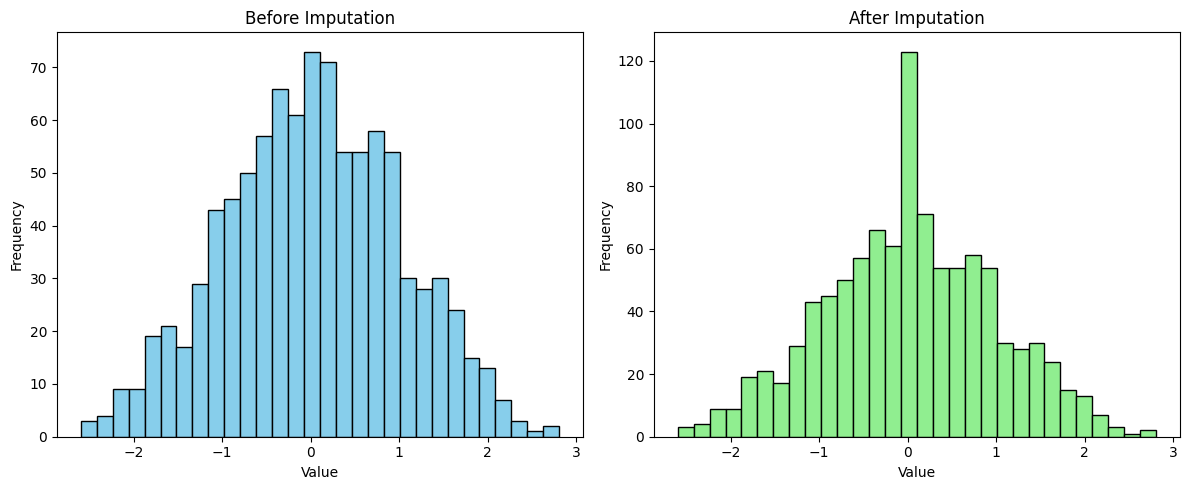

In [3]:
#QUESTION 8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate 1000 samples from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Introduce 50 random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'Value'] = np.nan

# Store copy before imputation
df_before = df.copy()

# Step 3: Fill missing values with column mean
mean_value = df['Value'].mean()
df['Value'].fillna(mean_value, inplace=True)

# Step 4: Plot histogram before and after imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_before['Value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Before Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Value'], bins=30, color='lightgreen', edgecolor='black')
plt.title('After Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
#QUESTION 9
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
data = np.array([[2], [5], [10], [15], [20]])

# Initialize scaler and apply Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Print result
print("Scaled data:\n", scaled_data)


Scaled data:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [7]:
#QUESTION 10
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Example dummy dataset
data = {
    'Age': [25, np.nan, 35, 40, np.nan, 29],
    'TransactionAmount': [100, 5000, 150, 200, 30000, 120],
    'PaymentMethod': ['Card', 'Cash', 'Card', 'Online', 'Cash', 'Card'],
    'Fraud': [0, 0, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# 1. Handle Missing Values (Age) - median imputation
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# 2. Handle Outliers in TransactionAmount using IQR capping
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_bound, upper_bound,
                                   np.where(df['TransactionAmount'] < lower_bound, lower_bound,
                                            df['TransactionAmount']))

# 3. Encode Categorical Variable - One-hot encoding
df_encoded = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)

# 4. Handle Imbalanced Target using SMOTE with k_neighbors=1
X = df_encoded.drop('Fraud', axis=1)
y = df_encoded['Fraud']

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original target distribution:\n", y.value_counts())
print("\nResampled target distribution:\n", pd.Series(y_resampled).value_counts())
print("\nPrepared feature data:\n", X_resampled.head())


Original target distribution:
 Fraud
0    4
1    2
Name: count, dtype: int64

Resampled target distribution:
 Fraud
0    4
1    4
Name: count, dtype: int64

Prepared feature data:
     Age  TransactionAmount  PaymentMethod_Cash  PaymentMethod_Online
0  25.0             100.00               False                 False
1  32.0            5000.00                True                 False
2  35.0             150.00               False                 False
3  40.0             200.00               False                  True
4  32.0            9308.75                True                 False
